# Projekt
## Maciej Złotorowicz


Wczyytywanie danych, należy przekonwertować dziwny format liczb na floaty ponieważ `read_csv` nie czyta

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display, Markdown

def displmd(*args, **kwargs):
    display(Markdown('\n\n'.join(arg for arg in args), **kwargs))

df = pd.read_csv("climate_model_sim_crashes.csv")

df = df.applymap(lambda x: float(str(x).replace(',', '.')))
df.head()

Study  Run  vconst_corr  vconst_2  vconst_3  vconst_4  vconst_5  vconst_6  \
0    1.0  1.0     0.859036  0.927825  0.252866  0.298838  0.170521  0.735936   
1    1.0  2.0     0.606041  0.457728  0.359448  0.306957  0.843331  0.934851   
2    1.0  3.0     0.997600  0.373238  0.517399  0.504993  0.618903  0.605571   
3    1.0  4.0     0.783408  0.104055  0.197533  0.421837  0.742056  0.490828   
4    1.0  5.0     0.406250  0.513199  0.061812  0.635837  0.844798  0.441502   

   vconst_7   ah_corr  ...  slm_corr  efficiency_factor  tidal_mix_max  \
0  0.428325  0.567947  ...  0.245675           0.104226       0.869091   
1  0.444572  0.828015  ...  0.616870           0.975786       0.914344   
2  0.746225  0.195928  ...  0.679355           0.803413       0.643995   
3  0.005525  0.392123  ...  0.471463           0.597879       0.761659   
4  0.191926  0.487546  ...  0.551543           0.743877       0.312349   

   vertical_decay_scale  convect_corr  bckgrnd_vdc1  bckgrnd_vdc_ban  \
0              0.997518      0.448620      0.307522         0.858310   
1              0.845247      0.864152      0.346713         0.356573   
2              0.718441      0.924775      0.315371         0.250642   
3              0.362751      0.912819      0.977971         0.845921   
4              0.650223      0.522261      0.043545         0.376660   

   bckgrnd_vdc_eq  bckgrnd_vdc_psim  outcome  
0        0.796997          0.869893      0.0  
1        0.438447          0.512256      1.0  
2        0.285636          0.365858      1.0  
3        0.699431          0.475987      1.0  
4        0.280098          0.132283      1.0  

[5 rows x 21 columns]

In [2]:
desc = df.describe()
desc

Study         Run  vconst_corr    vconst_2    vconst_3  \
count  540.000000  540.000000   540.000000  540.000000  540.000000   
mean     2.000000   90.500000     0.500026    0.500097    0.500027   
std      0.817254   52.008901     0.288939    0.288922    0.289067   
min      1.000000    1.000000     0.000414    0.001922    0.001181   
25%      1.000000   45.750000     0.249650    0.251597    0.251540   
50%      2.000000   90.500000     0.499998    0.499595    0.500104   
75%      3.000000  135.250000     0.750042    0.750011    0.749180   
max      3.000000  180.000000     0.999194    0.998815    0.998263   

         vconst_4    vconst_5    vconst_6    vconst_7     ah_corr  ...  \
count  540.000000  540.000000  540.000000  540.000000  540.000000  ...   
mean     0.500119    0.500001    0.499913    0.500059    0.500076  ...   
std      0.288993    0.288827    0.288852    0.289010    0.288909  ...   
min      0.001972    0.000858    0.000476    0.004590    0.000296  ...   
25%      0.250158    0.250630    0.251325    0.253048    0.250402  ...   
50%      0.500456    0.500903    0.499174    0.499070    0.500074  ...   
75%      0.750348    0.748988    0.748166    0.750109    0.749091  ...   
max      0.997673    0.998944    0.997142    0.998930    0.998506  ...   

         slm_corr  efficiency_factor  tidal_mix_max  vertical_decay_scale  \
count  540.000000         540.000000     540.000000            540.000000   
mean     0.500111           0.499984       0.500032              0.499933   
std      0.288966           0.289127       0.289014              0.288822   
min      0.002015           0.000419       0.001188              0.001312   
25%      0.250758           0.251676       0.249669              0.249988   
50%      0.500393           0.500322       0.500151              0.500625   
75%      0.749447           0.749346       0.749164              0.749569   
max      0.999536           0.999942       0.997718              0.997518   

       convect_corr  bckgrnd_vdc1  bckgrnd_vdc_ban  bckgrnd_vdc_eq  \
count    540.000000    540.000000       540.000000      540.000000   
mean       0.499944      0.499946         0.500044        0.500020   
std        0.288949      0.288923         0.288813        0.288936   
min        0.002509      0.000732         0.000891        0.000219   
25%        0.249586      0.249974         0.250412        0.252739   
50%        0.499080      0.499959         0.500384        0.498955   
75%        0.750012      0.747978         0.749256        0.748539   
max        0.999795      0.999155         0.997265        0.999306   

       bckgrnd_vdc_psim     outcome  
count        540.000000  540.000000  
mean           0.500021    0.914815  
std            0.289013    0.279416  
min            0.000263    0.000000  
25%            0.249723    1.000000  
50%            0.499431    1.000000  
75%            0.749792    1.000000  
max            0.999655    1.000000  

[8 rows x 21 columns]

In [3]:
displmd(
    f"### Średnia wartości docelowych jest daleka od `0.5`: `{desc['outcome']['mean']:0.2f}`",
    "Oznacza to że 90% próbek ma wartość docelową `1` a jedynie 10% ma wartość `0`. Nadaje to duże ryzyoko przetrenowania modelu. Należy użyć mocnej regularyzacji.",
    "Dotatkowo Run należy usunąć ponieważ posiada tylkko wartości unikalne i Study jest również warte usunięcia"
)

### Średnia wartości docelowych jest daleka od `0.5`: `0.91`

Oznacza to że 90% próbek ma wartość docelową `1` a jedynie 10% ma wartość `0`. Nadaje to duże ryzyoko przetrenowania modelu. Należy użyć mocnej regularyzacji.

Dotatkowo Run należy usunąć ponieważ posiada tylkko wartości unikalne i Study jest również warte usunięcia

## Usuwanie niepotrzebnych kolumn

Należy usunąć kolumny które nie są potrzebne do analizy są to kolumny `Run` i ewentualnie `Study`, chociaż ostatecznie została ona użyta do analizy ponieważ posiada dobrą korelację z `outcome`

In [6]:
target = pd.DataFrame(df['outcome'], columns=['outcome'])

data = df.drop(columns=['Run', 'outcome'])

xy = pd.concat([data, target], axis=1)

target.shape, data.shape

((540, 1), (540, 19))

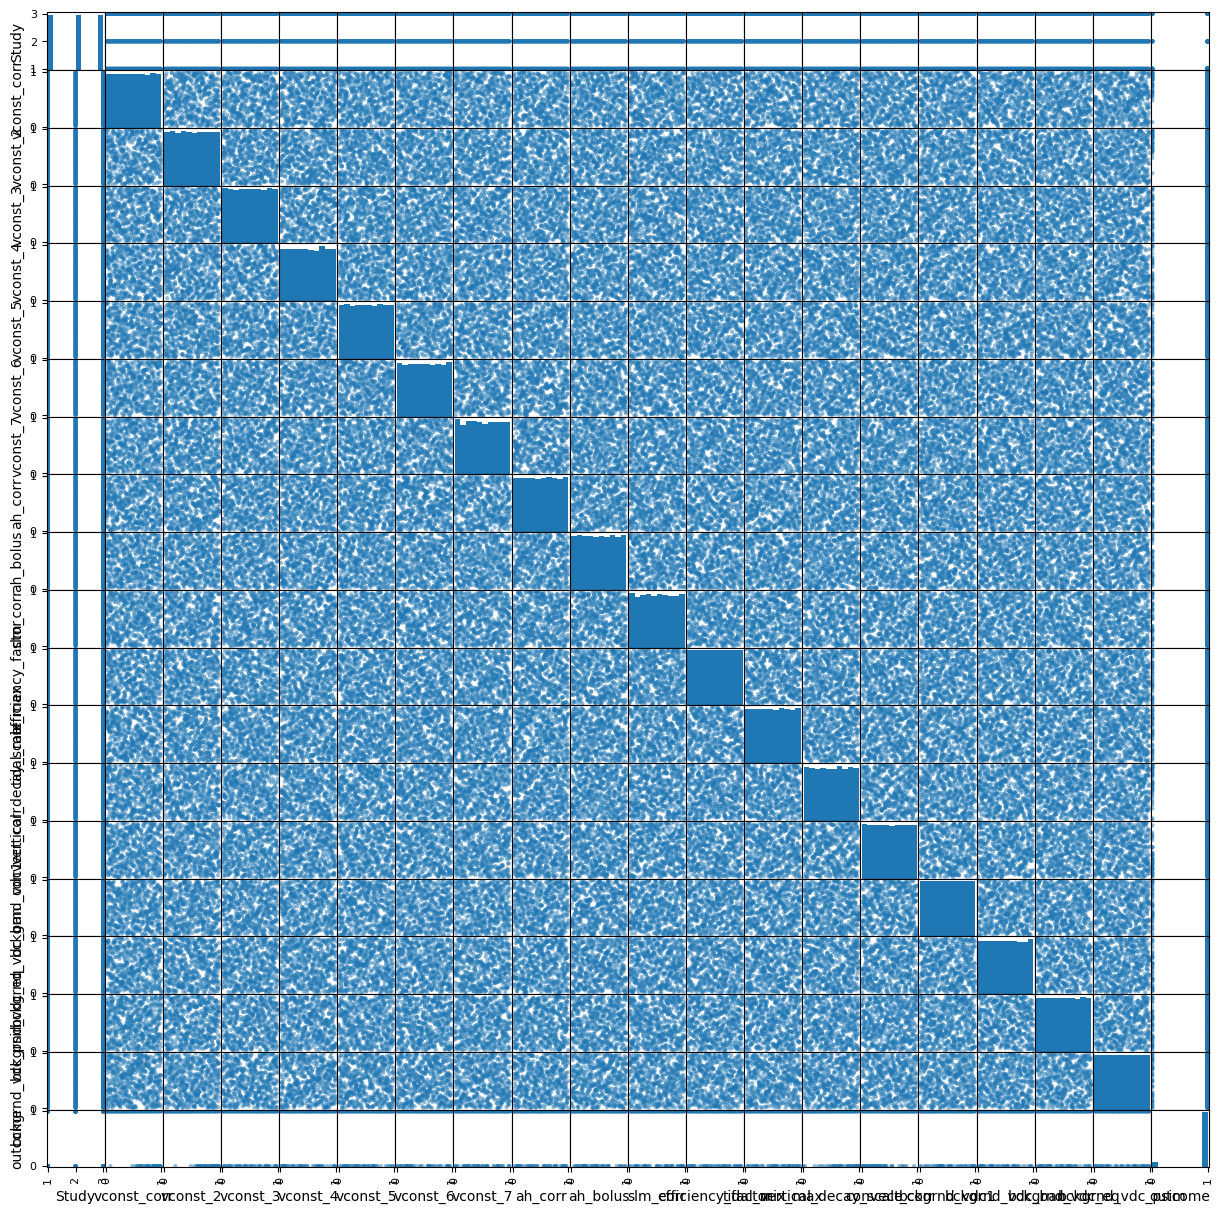

In [58]:
%matplotlib inline

_ = pd.plotting.scatter_matrix(xy, figsize=(15,15))

# Katastrofa. 
Ten obrazek jest dość niepokojący ale na szczęście korelacje między cechami nie są wcale potrzebne do produkowania dobrych wyników. Wynika to z faktu że cechy są parametrami modelu komputerowego i w celu stworzenia zbioru danych zostały one samplowane równomiernie.


Na szczęście owiele lepiej wygląda korelacja. O ile nie warto patrzeć na wartości inne poza `outcome` ponieważ tamte zależności wynikają jedynie z szumu to na całe szczęście niektóre parametry są od siebie zależne co pokazują nasycone kolory w ostatnim rzędzie i kolumnie. Niestety te korelacje są raczej słabe - próg został ustalony na $0.1$ 

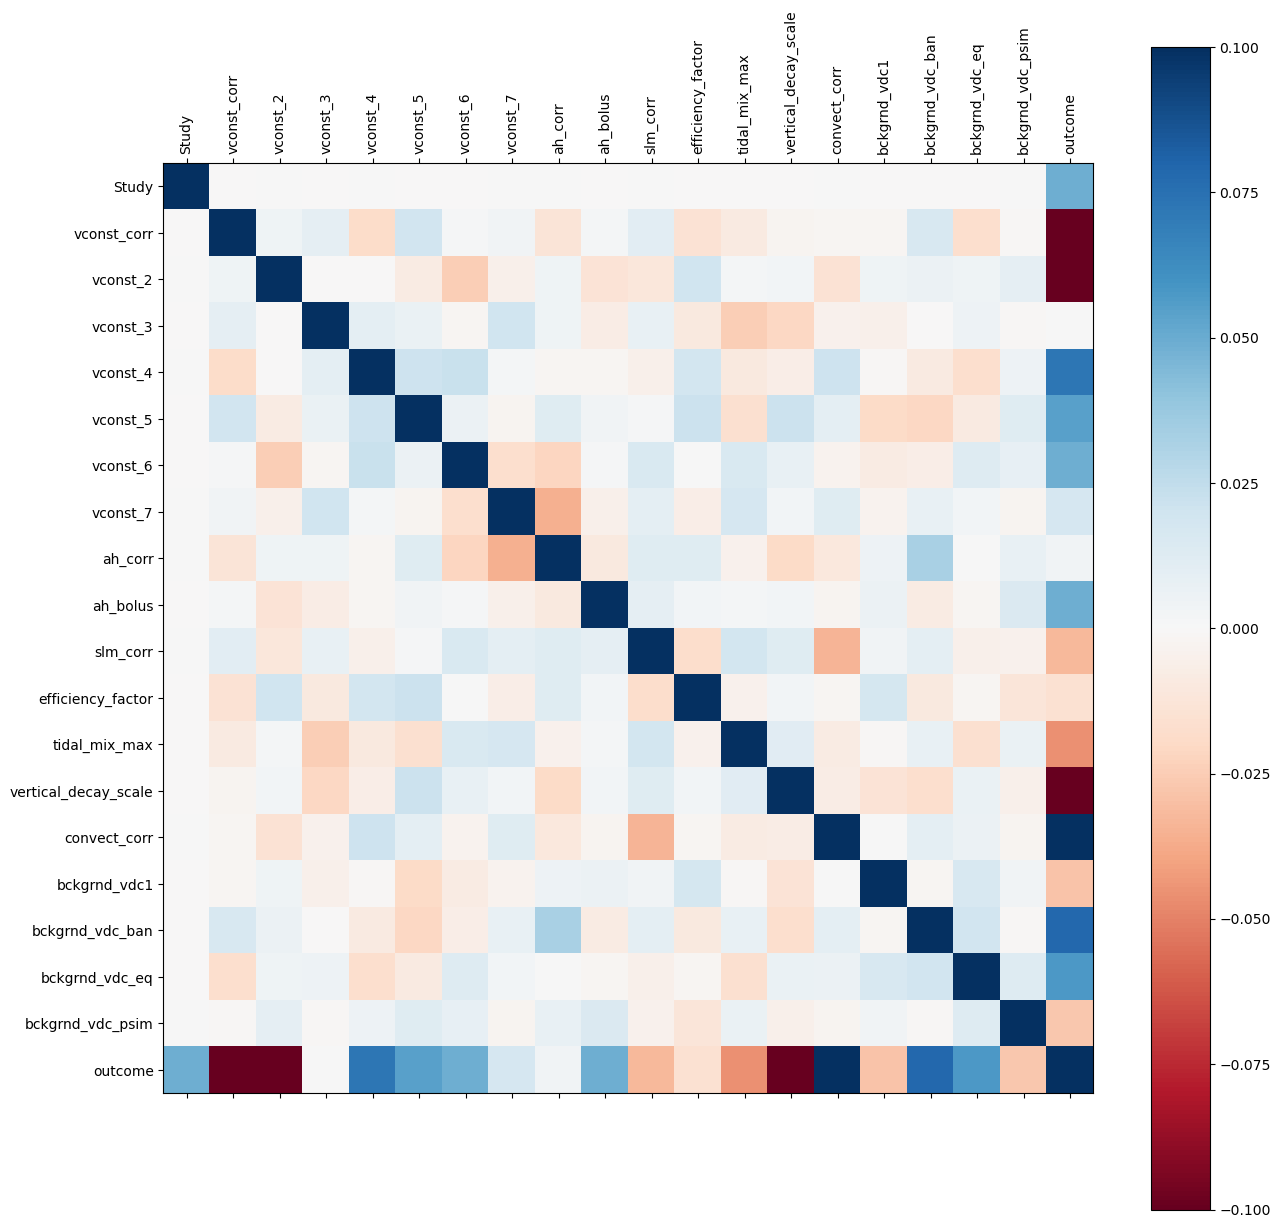

In [59]:
# linear correlation
corr = xy.corr()

# plot correlation matrix
plt.figure(figsize=(15,15))
plt.matshow(corr, fignum=1, cmap='RdBu', vmin=-0.1, vmax=0.1)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.show()

# Określenie sposobu ewaluacji modelu i podział zbioru na zbiór treningowy i testowy

Zdefiniowanie metryk, sposobu rysowania `confusion_matrix` itp.

Wybrane metryki to
* `True Positive` - ilość prawdziwie pozytywnych wyników
* `True Negative` - ilość prawdziwie negatywnych wyników
* `False Positive` - ilość fałszywie pozytywnych wyników
* `False Negative` - ilość fałszywie negatywnych wyników
* `Recall` - $tp / (tp + fn)$
* `Precision` - $tp / (tp + fp)$
* `Accuracy` - $(tp + tn) / (tp + tn + fp + fn)$
* `AUC` - pole pod krzywą ROC
* `r2` - współczynnik determinacji


Dodatkowo zostały wykonane wykresy `confusion_matrix` dla zbioru treningowego i testowego.

Podsumowanie wyników znajduje się w raporcie.

In [7]:
import keras.metrics as metrics
from sklearn.metrics import confusion_matrix
import sklearn.model_selection as skms
from sklearn.metrics import r2_score

train_x, test_x, train_y, test_y = skms.train_test_split(data, target, test_size=0.3, random_state=42)

METRICS = [
      metrics.TruePositives(name='tp'),
      metrics.FalsePositives(name='fp'),
      metrics.TrueNegatives(name='tn'),
      metrics.FalseNegatives(name='fn'), 
      metrics.Recall(name='recall'),
      metrics.Precision(name='pre'),
      metrics.Accuracy(name='acc'),
      metrics.AUC(name='prc', curve='PR')
]

def validate(y_pred_test, y_pred_train, train_y = train_y, test_y=test_y, title="Validation"):
    outcomnes = []

    for m in METRICS:
        m.reset_states()
        outcomnes.append([m.name, m(test_y, y_pred_test).numpy(), m(train_y, y_pred_train).numpy()])

    outcomnes.append(['r2', r2_score(test_y, y_pred_test), r2_score(train_y, y_pred_train)])

    df = pd.DataFrame(outcomnes, columns=['metric', 'test', 'train'])
    df = df.set_index('metric')
    
    displmd(
        f"# {title}",
        f"## Valitation output",
        df.to_markdown()
    )

    cm_test = confusion_matrix(test_y, y_pred_test)
    cm_train = confusion_matrix(train_y, y_pred_train)
    
    fig, axs = plt.subplots(1, 2)

    # set size
    fig.set_size_inches(12, 5)

    axs[0].set_title('Test Confusion Matrix')
    axs[0].matshow(cm_test, cmap='viridis', vmin=0, vmax=100)

    for (i, j), z in np.ndenumerate(cm_test):
        axs[0].text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

    axs[1].set_title('Train Confusion Matrix')
    axs[1].matshow(cm_train, cmap='viridis', vmin=0, vmax=100)

    for (i, j), z in np.ndenumerate(cm_train):
        axs[1].text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
    
    plt.show()

# Podejście pierwsze - baseline - trenowanie modelów na całym zbiorze

Uczenie prostego modelu liniowego, żeby zobaczyć jakie wyniki można uzyskać na całym zbiorze danych. W tym celu zostały użyte modele `LogisticRegression` z pakietu `sklearn.linear_model`. 

c:\Users\Maciej\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# **Baseline** Logistic Regression

## Valitation output

| metric   |        test |      train |
|:---------|------------:|-----------:|
| tp       | 148         | 494        |
| fp       |  12         |  36        |
| tn       |   2         |  10        |
| fn       |   0         |   0        |
| recall   |   1         |   1        |
| pre      |   0.925     |   0.932076 |
| acc      |   0.925926  |   0.933333 |
| prc      |   0.925     |   0.932076 |
| r2       |   0.0617761 |   0.180636 |

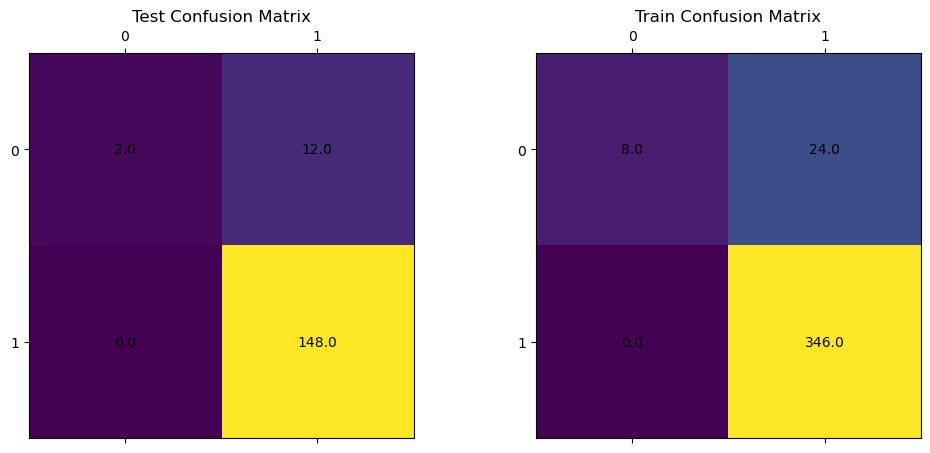

In [61]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(train_x, train_y)

y_pred_test = model.predict(test_x)
y_pred_train = model.predict(train_x)

validate(model.predict(test_x), model.predict(train_x), title="**Baseline** Logistic Regression")

In [62]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, data, np.array(target).reshape(-1), cv=5, scoring='r2')

def displScores(scores):
    displmd(
    f"### Cross validation scores",
    f"R2: `{scores}`",
    f"Mean: `{scores.mean()}`",
    f"Std: `{scores.std()}`"
)

displScores(scores)

### Cross validation scores

R2: `[ 0.44897959  0.15151515  0.27272727  0.15151515 -0.09090909]`

Mean: `0.18676561533704383`

Std: `0.17648456527484205`

# Podejście drugie - trenowanie modeli na zbalansowanym podzbiorze

Eksperyment polega na stworzeniu podzbioru danych w którym liczba próbek pozytywnych i negatywnych jest równa. Następnie uczenie modelu na tych danych. Później ten zbiór został wykorzystany również do tesowania innych modeli.

In [8]:
# get all rows that have coresponding value in target equal to 1
x = data
y = target

x1 = x[y['outcome'] == 1]
x0 = x[y['outcome'] == 0]

# count how many rows are in each class
n1 = len(x1)
n0 = len(x0)

# get the number of rows that we want to have in each class
n = min(n1, n0)

# get random indexes for each class

idx1 = np.random.choice(x1.index, n, replace=False)
idx0 = np.random.choice(x0.index, n, replace=False)

# get the rows with the indexes
x1 = x1.loc[idx1]
x0 = x0.loc[idx0]

# combine the two classes
x = pd.concat([x1, x0]).reset_index(drop=True)
y = pd.DataFrame(pd.concat([pd.Series([1] * n), pd.Series([0] * n)], axis=0), columns=['outcome']).reset_index(drop=True)

xy_b = pd.concat([x, y], axis=1)

# split the data into train and test

train_x_b, test_x_b, train_y_b, test_y_b = skms.train_test_split(x, y, test_size=0.2)

#train_x_b.shape, test_x_b.shape, train_y_b.shape, test_y_b.shape

displmd(
    f"### Balanced data",
    f"Train data shape: `{train_x_b.shape}`",
    f"Test data shape: `{test_x_b.shape}`",
    f"Train target shape: `{train_y_b.shape}`",
    f"Test target shape: `{test_y_b.shape}`"
)

### Balanced data

Train data shape: `(73, 19)`

Test data shape: `(19, 19)`

Train target shape: `(73, 1)`

Test target shape: `(19, 1)`

# Korelacja między cechami a wynikiem

Jedyną interesującą kolumną w tej macierzy korelacji jest `outcome` ponieważ reszta to szum.

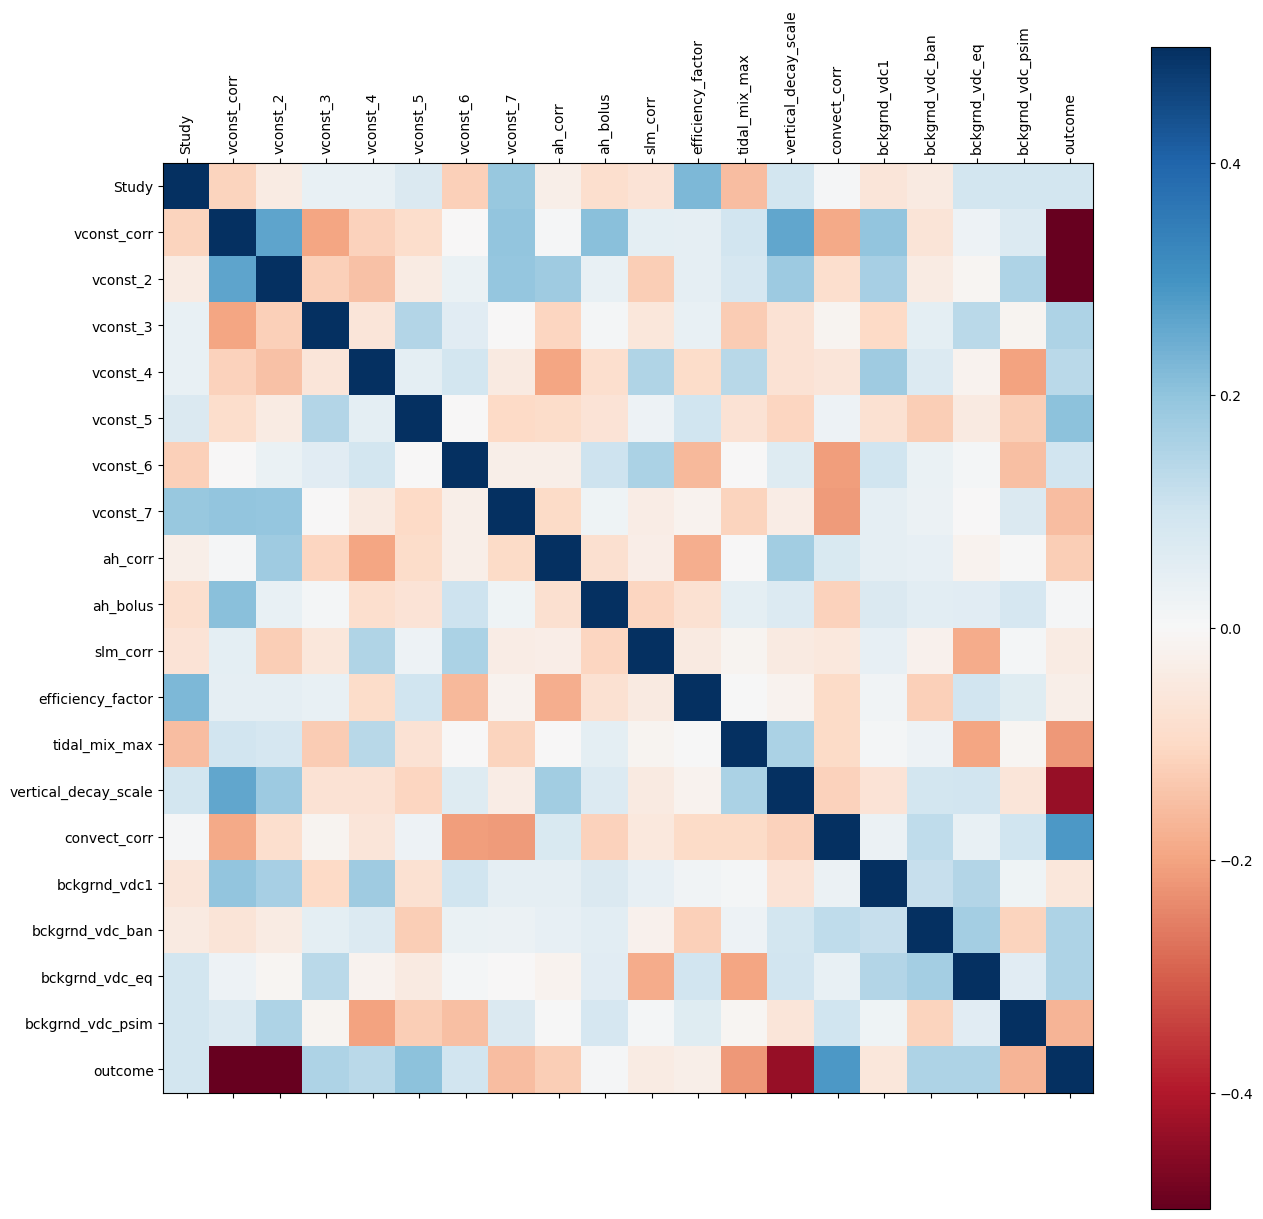

In [64]:
corr = xy_b.corr()

# plot correlation matrix
plt.figure(figsize=(15,15))
plt.matshow(corr, fignum=1, cmap='RdBu', vmin=-0.5, vmax=0.5)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.show()


c:\Users\Maciej\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Logistic regression trained on balanced dataset

## Valitation output

| metric   |     test |     train |
|:---------|---------:|----------:|
| tp       | 8        | 42        |
| fp       | 2        |  3        |
| tn       | 8        | 43        |
| fn       | 1        |  4        |
| recall   | 0.888889 |  0.913043 |
| pre      | 0.8      |  0.933333 |
| acc      | 0.842105 |  0.923913 |
| prc      | 0.778045 |  0.910077 |
| r2       | 0.366667 |  0.780781 |

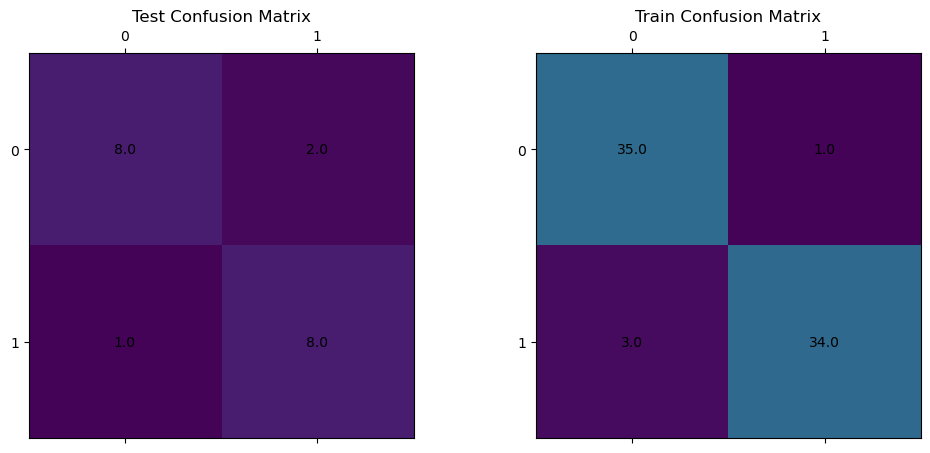

In [65]:
model_balanced = LogisticRegression()

model_balanced.fit(train_x_b, train_y_b)

y_pred_test = model_balanced.predict(test_x_b)
y_pred_train = model_balanced.predict(train_x_b)

validate(model_balanced.predict(test_x_b), model_balanced.predict(train_x_b), train_y_b, test_y_b, title="Logistic regression trained on balanced dataset")

In [66]:
scores = cross_val_score(model_balanced, data, np.array(target).reshape(-1), cv=3, scoring='r2')

displScores(scores)

### Cross validation scores

R2: `[ 0.31402439  0.12727273 -0.09090909]`

Mean: `0.11679600886917958`

Std: `0.16547930839644942`

# Podejście trzecie - trenowanie innych modeli na zbalansowanym podzbiorze i całym zbiorze

W tym eksperymencie zostało wykonane przeszukiwanie hiperparametrów dla modeli `LogisticRegression`, `RandomForestClassifier`, `SVC` i `KNeighborsClassifier` z pakietu `sklearn` w celu znalezienia najlepszych modeli. 

Wyniki przeszukiwania zostały zamieszczone niżej

In [67]:
import sklearn.linear_model as sklm
import sklearn.tree as sktr
import sklearn.pipeline as skpl
import sklearn.preprocessing as skpp
import sklearn.svm as sksvm
import sklearn.ensemble as sken

def gen_model1():
    model = skpl.Pipeline([
        ('norm', skpp.StandardScaler()),
        ('regr', sklm.LinearRegression()),
    ])
    return model

model_gs1 = gen_model1()

params = [
    {
        'regr': [sklm.Lasso()],
        'regr__alpha': [0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000],
    },{
        'regr': [sksvm.SVC()],
        'regr__kernel': ['linear', 'rbf', 'sigmoid'],
        'regr__C': [0.1, 0.5, 1, 3, 4, 5, 10],
    },{
        'regr': [sken.RandomForestClassifier()],
        'regr__n_estimators': [20, 30, 50, 100],
        'regr__max_depth': [None, 1, 2, 3],
        'regr__min_samples_split': [2, 3, 4],
        'regr__min_samples_leaf': [1, 2, 3, 4],
        'regr__min_weight_fraction_leaf': [0.0, 0.1, 0.4, 0.5],
    },{
        'regr': [sktr.DecisionTreeClassifier()],
        'regr__max_depth': [None, 1, 2, 3, 4, 5, 7, 8, 9, 10],
        'regr__min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
        'regr__min_samples_leaf': [1, 2, 4, 5, 6, 7, 8, 9, 10],
        'regr__min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    }
]

from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(model_gs1, params, cv=4, scoring='r2', n_jobs=-1)

grid.fit(train_x, np.array(train_y).reshape(-1))

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('norm', StandardScaler()),
                                       ('regr', LinearRegression())]),
             n_jobs=-1,
             param_grid=[{'regr': [Lasso()],
                          'regr__alpha': [0.1, 0.5, 1, 5, 10, 50, 100, 500,
                                          1000]},
                         {'regr': [SVC(C=0.5, kernel='linear')],
                          'regr__C': [0.1, 0.5, 1, 3, 4, 5, 10],
                          'regr__kernel': ['linear', 'rbf', 'sigmoid']},
                         {'regr': [RandomForestClassifier()],
                          'regr__max_depth...
                          'regr__min_samples_split': [2, 3, 4],
                          'regr__min_weight_fraction_leaf': [0.0, 0.1, 0.4,
                                                             0.5],
                          'regr__n_estimators': [20, 30, 50, 100]},
                         {'regr': [DecisionTreeClassifier()],


**SVC** totalnie zdominował wyniki, ale nie jest to zbyt zaskakujące ponieważ jest to model złożony i może być dobrze dopasowany do danych i dodatkowo nie jest on zbyt podatny na overfitting, ze względu na niego w pipelineie został dodany stopień `StandardScaler` który normalizuje dane ponieważ modele te są absurdalnie wrażliwe na skalowanie danych.

Jest też całkiem zaskakujace że RandomForestClassifier nie radzi sobie z tym zadaniem mimo wytrenowania bardzo dużej ilości takich modeli.

In [68]:
cvres = grid.cv_results_

cvresults = pd.DataFrame(cvres)

displmd(
    "## Grid search results - all data - all params",
    "### ", 
    cvresults[["mean_test_score", "rank_test_score", "params"]]
    .where(lambda x: x["mean_test_score"] > 0) #type: ignore
    .query("mean_test_score == mean_test_score")
    .sort_values(by="rank_test_score")
    .apply(lambda x: ({"test score": f"${x[0]:.5f}$", "params": f"`{x[2]}`"}), axis=1, result_type='expand') #type: ignore
    .head(20)
    .to_markdown() 
)

## Grid search results - all data - all params

### 

|    | test score   | params                                                                                                                                                                                    |
|---:|:-------------|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| 12 | $0.30365$    | `{'regr': SVC(C=0.5, kernel='linear'), 'regr__C': 0.5, 'regr__kernel': 'linear'}`                                                                                                         |
| 22 | $0.27988$    | `{'regr': SVC(C=0.5, kernel='linear'), 'regr__C': 4, 'regr__kernel': 'rbf'}`                                                                                                              |
| 25 | $0.27988$    | `{'regr': SVC(C=0.5, kernel='linear'), 'regr__C': 5, 'regr__kernel': 'rbf'}`                                                                                                              |
| 28 | $0.27988$    | `{'regr': SVC(C=0.5, kernel='linear'), 'regr__C': 10, 'regr__kernel': 'rbf'}`                                                                                                             |
| 26 | $0.26108$    | `{'regr': SVC(C=0.5, kernel='linear'), 'regr__C': 5, 'regr__kernel': 'sigmoid'}`                                                                                                          |
| 19 | $0.26009$    | `{'regr': SVC(C=0.5, kernel='linear'), 'regr__C': 3, 'regr__kernel': 'rbf'}`                                                                                                              |
|  9 | $0.23343$    | `{'regr': SVC(C=0.5, kernel='linear'), 'regr__C': 0.1, 'regr__kernel': 'linear'}`                                                                                                         |
| 15 | $0.22747$    | `{'regr': SVC(C=0.5, kernel='linear'), 'regr__C': 1, 'regr__kernel': 'linear'}`                                                                                                           |
| 27 | $0.20076$    | `{'regr': SVC(C=0.5, kernel='linear'), 'regr__C': 10, 'regr__kernel': 'linear'}`                                                                                                          |
| 24 | $0.18196$    | `{'regr': SVC(C=0.5, kernel='linear'), 'regr__C': 5, 'regr__kernel': 'linear'}`                                                                                                           |
| 20 | $0.17604$    | `{'regr': SVC(C=0.5, kernel='linear'), 'regr__C': 3, 'regr__kernel': 'sigmoid'}`                                                                                                          |
| 23 | $0.15625$    | `{'regr': SVC(C=0.5, kernel='linear'), 'regr__C': 4, 'regr__kernel': 'sigmoid'}`                                                                                                          |
| 18 | $0.15530$    | `{'regr': SVC(C=0.5, kernel='linear'), 'regr__C': 3, 'regr__kernel': 'linear'}`                                                                                                           |
| 21 | $0.07813$    | `{'regr': SVC(C=0.5, kernel='linear'), 'regr__C': 4, 'regr__kernel': 'linear'}`                                                                                                           |
| 29 | $0.03963$    | `{'regr': SVC(C=0.5, kernel='linear'), 'regr__C': 10, 'regr__kernel': 'sigmoid'}`                                                                                                         |
| 78 | $0.00881$    | `{'regr': RandomForestClassifier(), 'regr__max_depth': None, 'regr__min_samples_leaf': 2, 'regr__min_samples_split': 2, 'regr__min_weight_fraction_leaf': 0.0, 'regr__n_estimators': 20}` |

Aby uzyskać najlepsze wyniki, najlepszy model został wytrenowany na całym zbiorze danych uzyskując bardzo dobre wyniki.

# SVM - linear kernel

## Valitation output

| metric   |       test |      train |
|:---------|-----------:|-----------:|
| tp       | 147        | 491        |
| fp       |   4        |  12        |
| tn       |  10        |  34        |
| fn       |   1        |   3        |
| recall   |   0.993243 |   0.993927 |
| pre      |   0.97351  |   0.976143 |
| acc      |   0.969136 |   0.972222 |
| prc      |   0.973303 |   0.975953 |
| r2       |   0.609073 |   0.658598 |

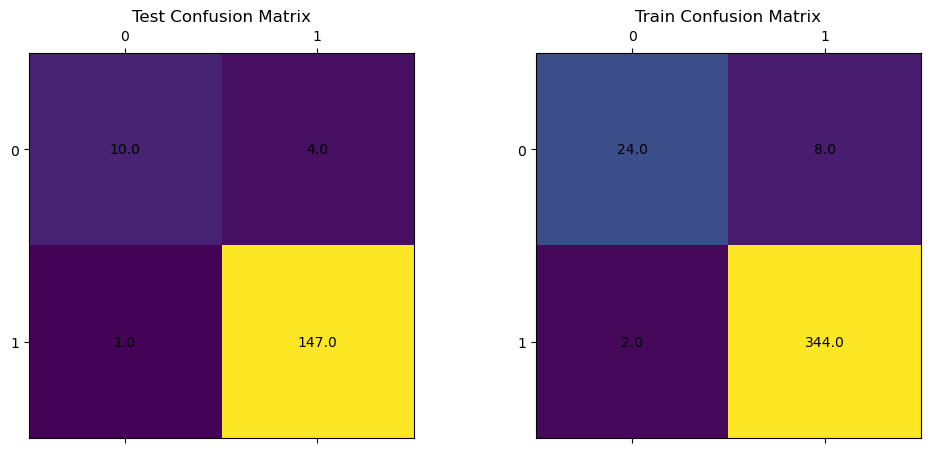

In [69]:
model_svr_rbf = skpl.Pipeline([
        ('norm', skpp.StandardScaler()),
        ('regr', sksvm.SVC(kernel='linear', C=0.5))])

model_svr_rbf.fit(train_x, np.array(train_y).reshape(-1))

#! Bardzo dobry wynik 
validate(model_svr_rbf.predict(test_x), model_svr_rbf.predict(train_x), title="SVM - linear kernel")

Aby sprawdzić czy model nie jest zbiasowany, zostanie przetestowany na zbalansowanym podzbiorze danych.

# SVM - linear kernel - balanced

## Valitation output

| metric   |     test |     train |
|:---------|---------:|----------:|
| tp       | 9        | 46        |
| fp       | 3        | 12        |
| tn       | 7        | 34        |
| fn       | 0        |  0        |
| recall   | 1        |  1        |
| pre      | 0.75     |  0.793103 |
| acc      | 0.842105 |  0.869565 |
| prc      | 0.75     |  0.793103 |
| r2       | 0.366667 |  0.506757 |

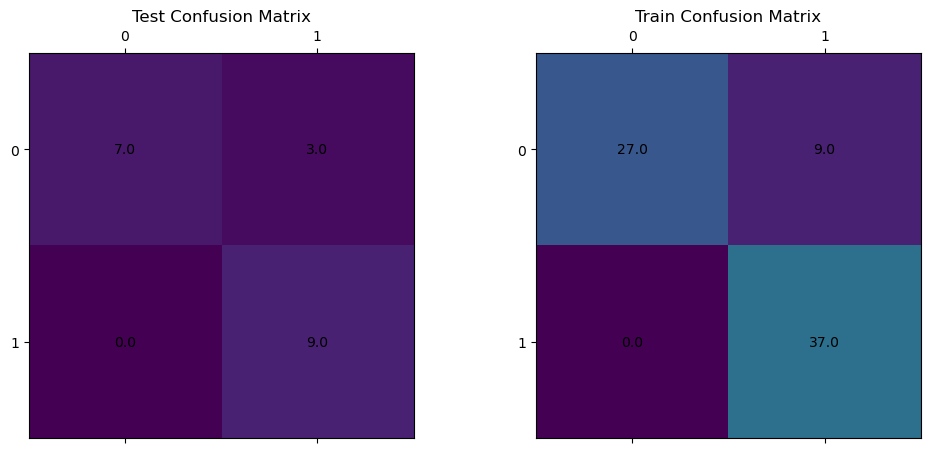

In [70]:
validate(model_svr_rbf.predict(test_x_b), model_svr_rbf.predict(train_x_b), train_y_b, test_y_b, title="SVM - linear kernel - balanced")

In [71]:
# coss validation
scores = cross_val_score(model_svr_rbf, data, np.array(target).reshape(-1), cv=5, scoring='r2')

displScores(scores)

### Cross validation scores

R2: `[0.55918367 0.39393939 0.27272727 0.03030303 0.27272727]`

Mean: `0.3057761286332714`

Std: `0.17323857929823822`

## Model SVC z ważonymi klasami

Następnym eksperymentem jest sprawdzenie czy **SVC** nie radzi sobie lepiej po dodaniu parametru `class_weight` który jest odpowiedzialny za wagę klas. W tym celu zostały obliczone wagi klas na podstawie ilości próbek w zbiorze danych.


Niestety model nie radzi sobie tak samo dobrze jak zwykły, ale przynajmniej posiada 100% prezycje.

# SVM - linear kernel - weighted

## Valitation output

| metric   |        test |       train |
|:---------|------------:|------------:|
| tp       | 134         | 450         |
| fp       |   0         |   2         |
| tn       |  14         |  44         |
| fn       |  14         |  44         |
| recall   |   0.905405  |   0.910931  |
| pre      |   1         |   0.995575  |
| acc      |   0.91358   |   0.914815  |
| prc      |   0.995654  |   0.991766  |
| r2       |  -0.0945946 |  -0.0924855 |

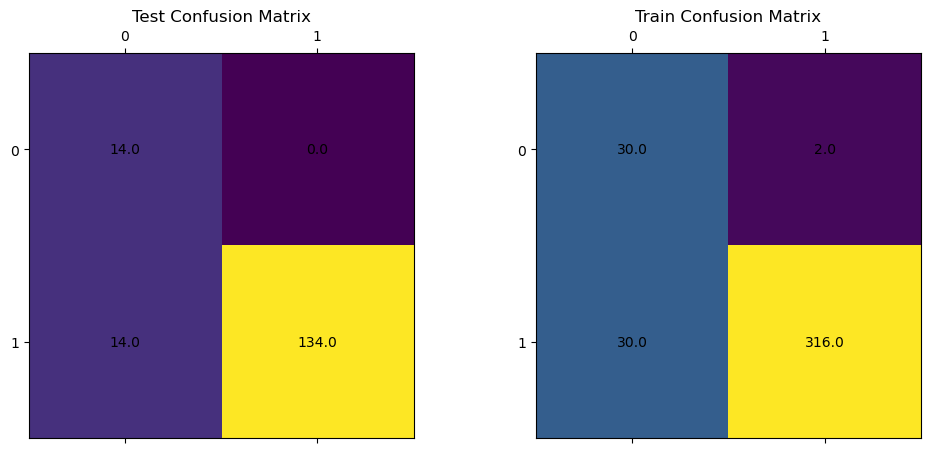

In [72]:
import sklearn.utils as skut

weights = skut.class_weight.compute_class_weight('balanced', classes=[0, 1], y=np.array(train_y['outcome']))

w = {0: weights[0], 1: weights[1]}

strenght = 1
weights = {0: weights[0]*strenght, 1: weights[1]}

weights = np.array([weights[i] for i in train_y['outcome']])

model_svr_rbf = skpl.Pipeline([
        ('norm', skpp.StandardScaler()),
        ('regr', sksvm.SVC(kernel='linear', C=1))])

model_svr_rbf.fit(train_x, np.array(train_y).reshape(-1), regr__sample_weight=weights)

validate(model_svr_rbf.predict(test_x), model_svr_rbf.predict(train_x), title="SVM - linear kernel - weighted")

Pewnym efektem ubocznym jest rekorodowo wysoka wartość $r^2$ dla zbalansowanego zbioru danych.

# SVM - linear kernel - weighted - balanced

## Valitation output

| metric   |     test |     train |
|:---------|---------:|----------:|
| tp       | 7        | 40        |
| fp       | 1        |  2        |
| tn       | 9        | 44        |
| fn       | 2        |  6        |
| recall   | 0.777778 |  0.869565 |
| pre      | 0.875    |  0.952381 |
| acc      | 0.842105 |  0.913043 |
| prc      | 0.817865 |  0.915321 |
| r2       | 0.366667 |  0.725976 |

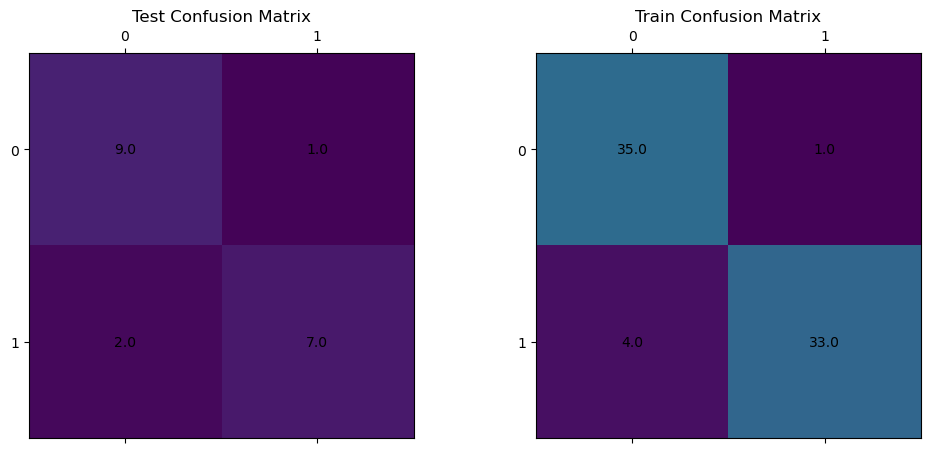

In [73]:
validate(model_svr_rbf.predict(test_x_b), model_svr_rbf.predict(train_x_b), train_y_b, test_y_b, title="SVM - linear kernel - weighted - balanced")

In [74]:
# coss validation
scores = cross_val_score(model_svr_rbf, data, np.array(target).reshape(-1), cv=5, scoring='r2')

displScores(scores)

### Cross validation scores

R2: `[0.33877551 0.39393939 0.39393939 0.15151515 0.63636364]`

Mean: `0.3829066171923314`

Std: `0.15490220778603908`

# Podejście czwarte - trenowanie svc na całym zbiorze i polyfeatures

Kolejnym esperymentem jest sprawdzenie czy SVC radzi sobie lepiej po dodaniu wielomianowych cech. W tym celu został użyty `PolynomialFeatures` z pakietu `sklearn.preprocessing` który dodaje do zbioru danych wielomianowe cechy.

Niestety nawet po przeszukaniu hiperparametrów nie udało się uzyskać lepszych wyników niż w poprzednim eksperymencie.

Model `SVC` powinien samoistnie dobierać pasujące cechy wielomianowe bez przetrenowania ale w każdym przypadku radził sobie lepiej bez nich

In [75]:
def gen_model_poly_scv():
    model = skpl.Pipeline([
        ('poly', skpp.PolynomialFeatures(degree=2)),
        ('norm', skpp.StandardScaler()),
        ('regr', sksvm.LinearSVC(loss='hinge')),
    ])
    return model

model_gs3 = gen_model_poly_scv()

params = {
    'poly__degree': [1, 2, 3],
    'regr__C': [0.1, 0.5, 1, 5, 10, 12, 15, 20, 50, 100, 500, 1000],
}

grid = GridSearchCV(model_gs3, params, cv=5, scoring='r2', n_jobs=-1)

grid.fit(train_x, np.array(train_y).reshape(-1))

c:\Users\Maciej\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('norm', StandardScaler()),
                                       ('regr', LinearSVC(loss='hinge'))]),
             n_jobs=-1,
             param_grid={'poly__degree': [1, 2, 3],
                         'regr__C': [0.1, 0.5, 1, 5, 10, 12, 15, 20, 50, 100,
                                     500, 1000]},
             scoring='r2')

In [76]:
cvres = grid.cv_results_

cvresults = pd.DataFrame(cvres)

displmd(
    "## Grid search results - balanced data - poly params",
    "### ", 
    cvresults[["mean_test_score", "rank_test_score", "params"]]
    .where(lambda x: x["mean_test_score"] > 0) #type: ignore
    .query("mean_test_score == mean_test_score")
    .sort_values(by="rank_test_score")
    .apply(lambda x: ({"test score": f"${x[0]:.5f}$", "params": f"`{x[2]}`"}), axis=1, result_type='expand') #type: ignore
    .head(20)
    .to_markdown() 
)

## Grid search results - balanced data - poly params

### 

|    | test score   | params                                 |
|---:|:-------------|:---------------------------------------|
|  3 | $0.43180$    | `{'poly__degree': 1, 'regr__C': 5}`    |
|  2 | $0.39557$    | `{'poly__degree': 1, 'regr__C': 1}`    |
|  6 | $0.36886$    | `{'poly__degree': 1, 'regr__C': 15}`   |
|  4 | $0.36414$    | `{'poly__degree': 1, 'regr__C': 10}`   |
|  5 | $0.36414$    | `{'poly__degree': 1, 'regr__C': 12}`   |
|  1 | $0.32787$    | `{'poly__degree': 1, 'regr__C': 0.5}`  |
|  7 | $0.29168$    | `{'poly__degree': 1, 'regr__C': 20}`   |
| 21 | $0.22389$    | `{'poly__degree': 2, 'regr__C': 100}`  |
| 20 | $0.22389$    | `{'poly__degree': 2, 'regr__C': 50}`   |
| 19 | $0.22389$    | `{'poly__degree': 2, 'regr__C': 20}`   |
| 18 | $0.22389$    | `{'poly__degree': 2, 'regr__C': 15}`   |
| 17 | $0.22389$    | `{'poly__degree': 2, 'regr__C': 12}`   |
| 16 | $0.22389$    | `{'poly__degree': 2, 'regr__C': 10}`   |
| 15 | $0.22389$    | `{'poly__degree': 2, 'regr__C': 5}`    |
| 23 | $0.22389$    | `{'poly__degree': 2, 'regr__C': 1000}` |
| 13 | $0.22389$    | `{'poly__degree': 2, 'regr__C': 0.5}`  |
| 22 | $0.22389$    | `{'poly__degree': 2, 'regr__C': 500}`  |
| 14 | $0.22389$    | `{'poly__degree': 2, 'regr__C': 1}`    |
|  8 | $0.19251$    | `{'poly__degree': 1, 'regr__C': 50}`   |
|  9 | $0.19246$    | `{'poly__degree': 1, 'regr__C': 100}`  |

# Podejście piąte - trenowanie na mocno regularyzowanych sieciach neuronowych

Aby przebić wyniki SVC, trzeba sięgnąć po sieci neuronowe które są znacznie bardziej elastyczne i można dokładnie dopasować proces uczenia do danych. W tym celu zostały użyte sieci neuronowe z pakietu `keras` z backendem `tensorflow`.

Sieci zostały wytrenowane w trzech wariantach

* Bez regularyzacji poza dropoutem
* Ze zmodifikowanym biasem
* Z zmodyfikowanymi wagami klas

Decyzje te wynikają z tego że sieci neuronowe są bardzo podatne na overfitting i trzeba je agresywnie regularyzować. 
Pomysły na regularyzację pochodzą z tego artykułu: http://karpathy.github.io/2019/04/25/recipe/#2-set-up-the-end-to-end-trainingevaluation-skeleton--get-dumb-baselines

Jako nauczka z labolatoriów tym razem model został przygotowany z głową i został dodany `EarlyStopping` który zatrzymuje uczenie gdy model przestaje się poprawiać na zbiorze walidacyjnym - co oszczędziło sporo czasu.

In [77]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.optimizers import Adam
import keras.regularizers as regularizers
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal
import tensorflow as tf
import keras.metrics as metrics

def gen_model_nn(output_bias): 
    if output_bias is not None:
        output_bias = tf.keras.initializers.Constant(output_bias)
    model = Sequential()
    model.add(Input(shape=(train_x.shape[1])))
    model.add(Dense(32, activation='elu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='elu'))
    model.add(Dropout(0.5)) 
    model.add(Dense(32, activation='elu'))
    model.add(Dropout(0.5)) 
    model.add(Dense(1, activation='sigmoid', bias_initializer=output_bias))

    return model

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_prc', 
    verbose=1,
    patience=20,
    mode='max',
    restore_best_weights=True)

model_nn = gen_model_nn(None)

model_nn.compile(optimizer=Adam(0.005), loss='binary_crossentropy', metrics=METRICS)

history1 = model_nn.fit(train_x, train_y, epochs=100, batch_size=32, validation_data=(test_x, test_y), callbacks=[early_stopping])

Epoch 1/100
12/12 [==============================] - 2s 54ms/step - loss: 0.3457 - tp: 377.0000 - fp: 34.0000 - tn: 44.0000 - fn: 15.0000 - recall: 0.9617 - pre: 0.9173 - acc: 0.1787 - prc: 0.9367 - val_loss: 0.3269 - val_tp: 148.0000 - val_fp: 14.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_recall: 1.0000 - val_pre: 0.9136 - val_acc: 0.0000e+00 - val_prc: 0.9467
Epoch 2/100
12/12 [==============================] - 0s 14ms/step - loss: 0.2954 - tp: 344.0000 - fp: 32.0000 - tn: 0.0000e+00 - fn: 2.0000 - recall: 0.9942 - pre: 0.9149 - acc: 0.0000e+00 - prc: 0.9467 - val_loss: 0.2905 - val_tp: 148.0000 - val_fp: 14.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_recall: 1.0000 - val_pre: 0.9136 - val_acc: 0.0000e+00 - val_prc: 0.9574
Epoch 3/100
12/12 [==============================] - 0s 19ms/step - loss: 0.3112 - tp: 340.0000 - fp: 31.0000 - tn: 1.0000 - fn: 6.0000 - recall: 0.9827 - pre: 0.9164 - acc: 0.0000e+00 - prc: 0.9390 - val_loss: 0.2919 - val_tp: 148.0000 - val_fp:

12/12 [==============================] - 0s 2ms/step


# NN - baseline

## Valitation output

| metric   |       test |      train |
|:---------|-----------:|-----------:|
| tp       | 145        | 486        |
| fp       |   3        |  11        |
| tn       |  11        |  35        |
| fn       |   3        |   8        |
| recall   |   0.97973  |   0.983806 |
| pre      |   0.97973  |   0.977867 |
| acc      |   0.962963 |   0.964815 |
| prc      |   0.979039 |   0.977342 |
| r2       |   0.530888 |   0.556178 |

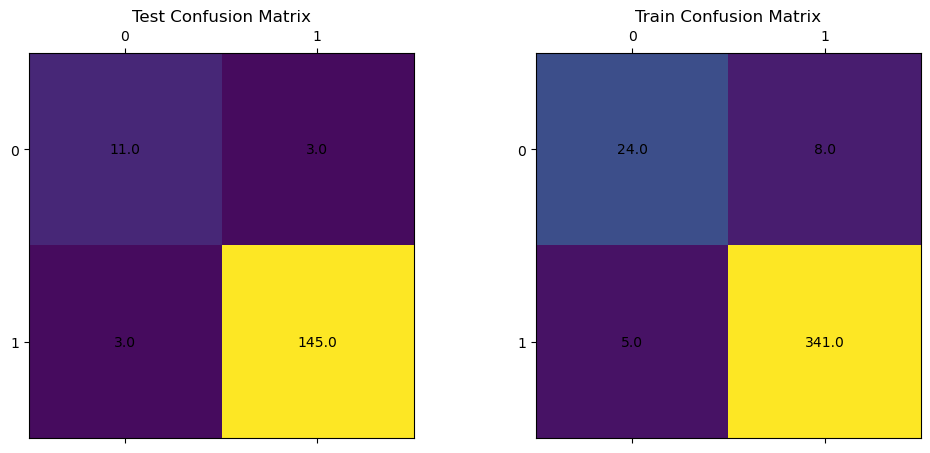

In [78]:
validate(model_nn.predict(test_x)>0.5, model_nn.predict(train_x)>0.5, title="NN - baseline")

3/3 [==============================] - 0s 2ms/step


# NN - baseline - balanced dataset

## Valitation output

| metric   |     test |     train |
|:---------|---------:|----------:|
| tp       | 8        | 45        |
| fp       | 3        | 11        |
| tn       | 7        | 35        |
| fn       | 1        |  1        |
| recall   | 0.888889 |  0.978261 |
| pre      | 0.727273 |  0.803571 |
| acc      | 0.789474 |  0.869565 |
| prc      | 0.710643 |  0.79973  |
| r2       | 0.155556 |  0.561562 |

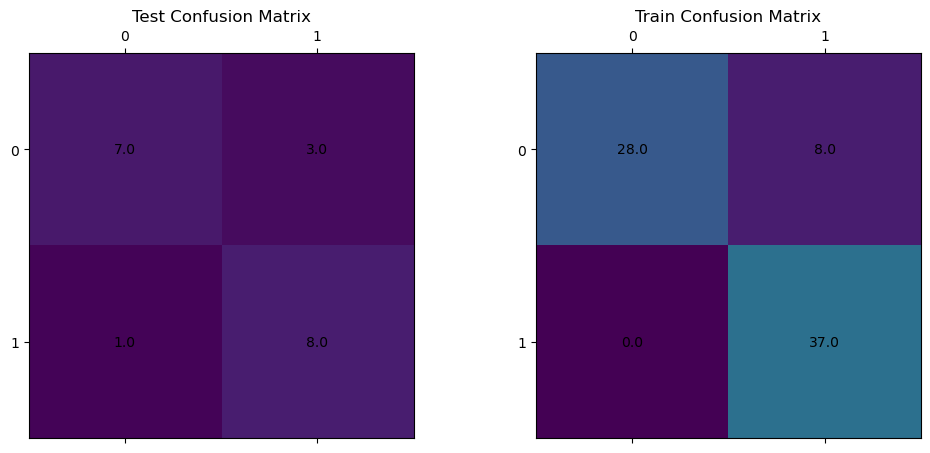

In [79]:
validate(model_nn.predict(test_x_b)>0.5, model_nn.predict(train_x_b)>0.5, train_y_b, test_y_b, title="NN - baseline - balanced dataset")

In [80]:
initial_bias = np.log([n0/n1])
initial_bias

array([-2.37389412])

In [81]:
model_nn_b = gen_model_nn(initial_bias)

model_nn_b.compile(optimizer=Adam(0.002), loss='binary_crossentropy', metrics=METRICS)

history2 = model_nn_b.fit(train_x, train_y, epochs=200, batch_size=64, validation_data=(test_x, test_y), callbacks=[early_stopping])

Epoch 1/200
6/6 [==============================] - 2s 110ms/step - loss: 1.6145 - tp: 104.0000 - fp: 13.0000 - tn: 65.0000 - fn: 288.0000 - recall: 0.2653 - pre: 0.8889 - acc: 0.1702 - prc: 0.8851 - val_loss: 0.8118 - val_tp: 36.0000 - val_fp: 0.0000e+00 - val_tn: 14.0000 - val_fn: 112.0000 - val_recall: 0.2432 - val_pre: 1.0000 - val_acc: 0.0000e+00 - val_prc: 0.9354
Epoch 2/200
6/6 [==============================] - 0s 16ms/step - loss: 0.8803 - tp: 175.0000 - fp: 13.0000 - tn: 19.0000 - fn: 171.0000 - recall: 0.5058 - pre: 0.9309 - acc: 0.0000e+00 - prc: 0.9349 - val_loss: 0.3231 - val_tp: 148.0000 - val_fp: 14.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_recall: 1.0000 - val_pre: 0.9136 - val_acc: 0.0000e+00 - val_prc: 0.9273
Epoch 3/200
6/6 [==============================] - 0s 17ms/step - loss: 0.5498 - tp: 291.0000 - fp: 26.0000 - tn: 6.0000 - fn: 55.0000 - recall: 0.8410 - pre: 0.9180 - acc: 0.0000e+00 - prc: 0.9066 - val_loss: 0.3469 - val_tp: 148.0000 - val_fp: 14.000

12/12 [==============================] - 0s 2ms/step


# NN - biased

## Valitation output

| metric   |       test |      train |
|:---------|-----------:|-----------:|
| tp       | 144        | 488        |
| fp       |   1        |   9        |
| tn       |  13        |  37        |
| fn       |   4        |   6        |
| recall   |   0.972973 |   0.987854 |
| pre      |   0.993103 |   0.981891 |
| acc      |   0.969136 |   0.972222 |
| prc      |   0.991989 |   0.981473 |
| r2       |   0.609073 |   0.658598 |

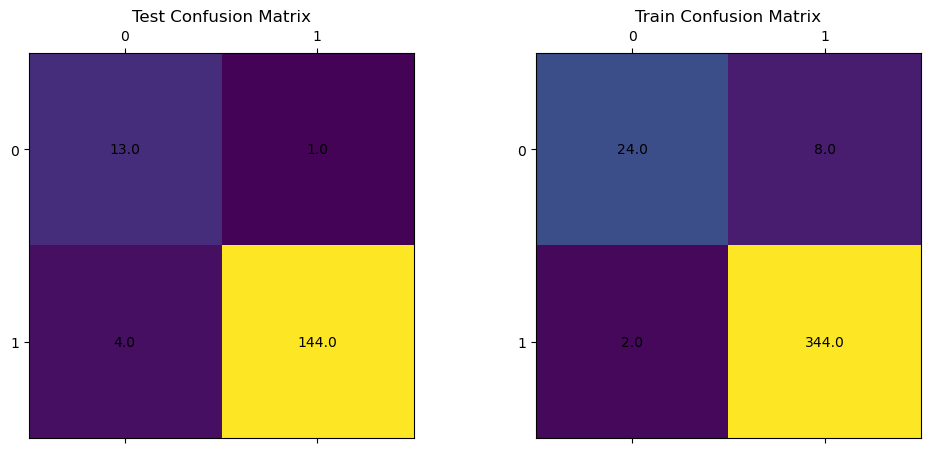

In [82]:
validate(model_nn_b.predict(test_x)>0.5, model_nn_b.predict(train_x)>0.5, title="NN - biased")

3/3 [==============================] - 0s 2ms/step


# NN - biased - balanced dataset

## Valitation output

| metric   |     test |     train |
|:---------|---------:|----------:|
| tp       | 8        | 45        |
| fp       | 3        |  9        |
| tn       | 7        | 37        |
| fn       | 1        |  1        |
| recall   | 0.888889 |  0.978261 |
| pre      | 0.727273 |  0.833333 |
| acc      | 0.789474 |  0.891304 |
| prc      | 0.710643 |  0.829073 |
| r2       | 0.155556 |  0.671171 |

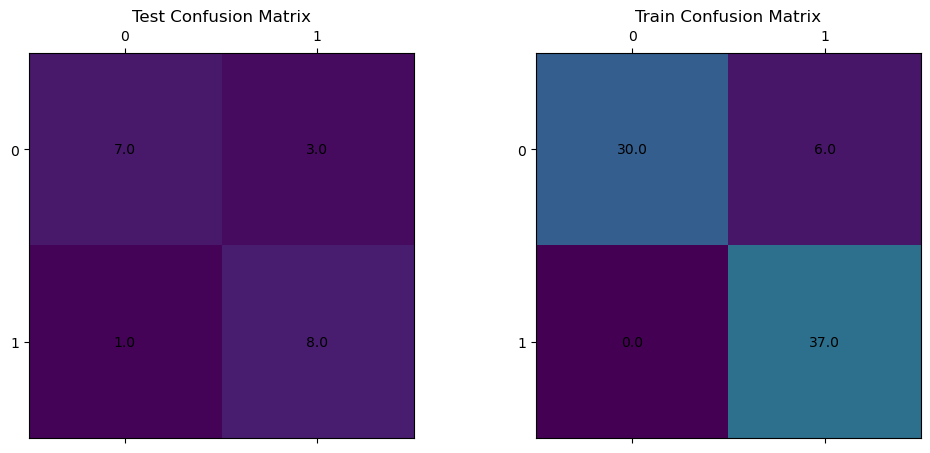

In [83]:
validate(model_nn_b.predict(test_x_b)>0.5, model_nn_b.predict(train_x_b)>0.5, train_y_b, test_y_b, title="NN - biased - balanced dataset")

In [84]:
model_nn_bw = gen_model_nn(None)

model_nn_bw.compile(optimizer=Adam(0.004), loss='binary_crossentropy', metrics=METRICS)

strenght = 0.1
weights = {0: w[0]*strenght, 1: w[1]}
history3 = model_nn_bw.fit(train_x, train_y, epochs=200, batch_size=64, validation_data=(test_x, test_y), callbacks=[early_stopping], class_weight=weights)

Epoch 1/200
6/6 [==============================] - 2s 133ms/step - loss: 0.3081 - tp: 300.0000 - fp: 30.0000 - tn: 48.0000 - fn: 92.0000 - recall: 0.7653 - pre: 0.9091 - acc: 0.1745 - prc: 0.8966 - val_loss: 0.3077 - val_tp: 148.0000 - val_fp: 14.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_recall: 1.0000 - val_pre: 0.9136 - val_acc: 0.0000e+00 - val_prc: 0.9161
Epoch 2/200
6/6 [==============================] - 0s 17ms/step - loss: 0.2187 - tp: 340.0000 - fp: 32.0000 - tn: 0.0000e+00 - fn: 6.0000 - recall: 0.9827 - pre: 0.9140 - acc: 0.0000e+00 - prc: 0.9306 - val_loss: 0.3788 - val_tp: 148.0000 - val_fp: 14.0000 - val_tn: 0.0000e+00 - val_fn: 0.0000e+00 - val_recall: 1.0000 - val_pre: 0.9136 - val_acc: 0.0000e+00 - val_prc: 0.9230
Epoch 3/200
6/6 [==============================] - 0s 17ms/step - loss: 0.2460 - tp: 342.0000 - fp: 32.0000 - tn: 0.0000e+00 - fn: 4.0000 - recall: 0.9884 - pre: 0.9144 - acc: 0.0000e+00 - prc: 0.9141 - val_loss: 0.3230 - val_tp: 148.0000 - val_fp: 

12/12 [==============================] - 0s 2ms/step


# NN - weighted

## Valitation output

| metric   |       test |      train |
|:---------|-----------:|-----------:|
| tp       | 145        | 490        |
| fp       |   1        |   9        |
| tn       |  13        |  37        |
| fn       |   3        |   4        |
| recall   |   0.97973  |   0.991903 |
| pre      |   0.993151 |   0.981964 |
| acc      |   0.975309 |   0.975926 |
| prc      |   0.992316 |   0.981685 |
| r2       |   0.687259 |   0.692738 |

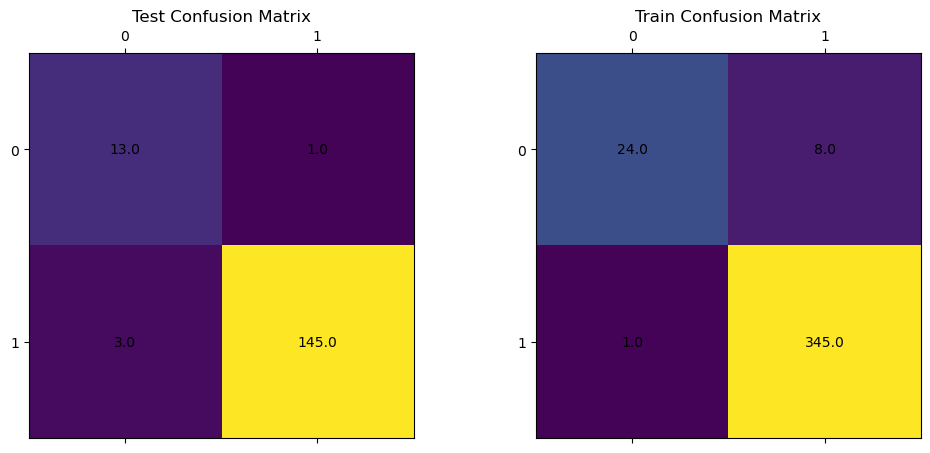

In [85]:
validate(model_nn_bw.predict(test_x)>0.5, model_nn_bw.predict(train_x)>0.5, title="NN - weighted")

3/3 [==============================] - 0s 2ms/step


# NN - weighted - balanced dataset

## Valitation output

| metric   |     test |     train |
|:---------|---------:|----------:|
| tp       | 8        | 45        |
| fp       | 3        |  9        |
| tn       | 7        | 37        |
| fn       | 1        |  1        |
| recall   | 0.888889 |  0.978261 |
| pre      | 0.727273 |  0.833333 |
| acc      | 0.789474 |  0.891304 |
| prc      | 0.710643 |  0.829073 |
| r2       | 0.155556 |  0.671171 |

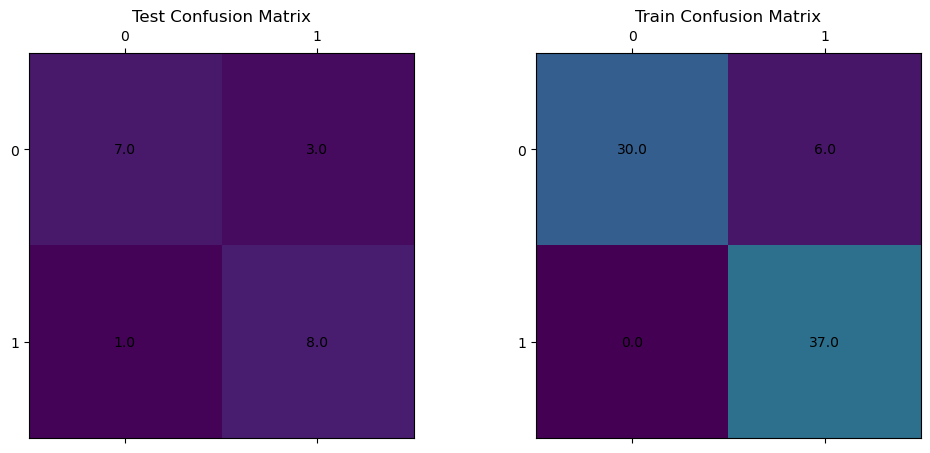

In [86]:
validate(model_nn_bw.predict(test_x_b)>0.5, model_nn_bw.predict(train_x_b)>0.5, train_y_b, test_y_b, title="NN - weighted - balanced dataset")

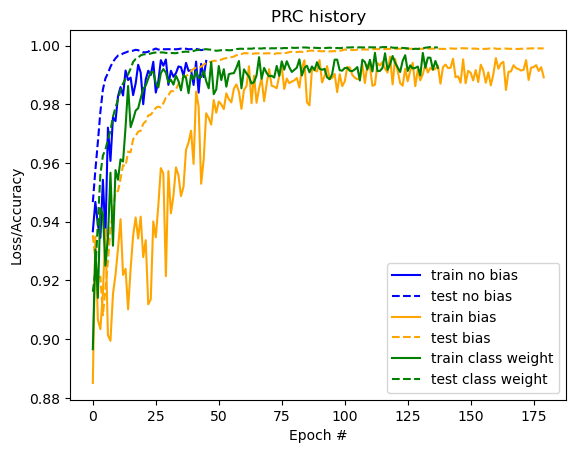

In [87]:
plt.plot(history1.history['prc'], color='blue', label='train no bias')
plt.plot(history1.history['val_prc'], color='blue',linestyle="--",  label='test no bias')

plt.plot(history2.history['prc'], color='orange', label='train bias')
plt.plot(history2.history['val_prc'], color='orange', linestyle="--", label='test bias')

plt.plot(history3.history['prc'], color='green', label='train class weight')
plt.plot(history3.history['val_prc'], color='green', linestyle="--", label='test class weight')

plt.title("PRC history")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="best")

plt.show()


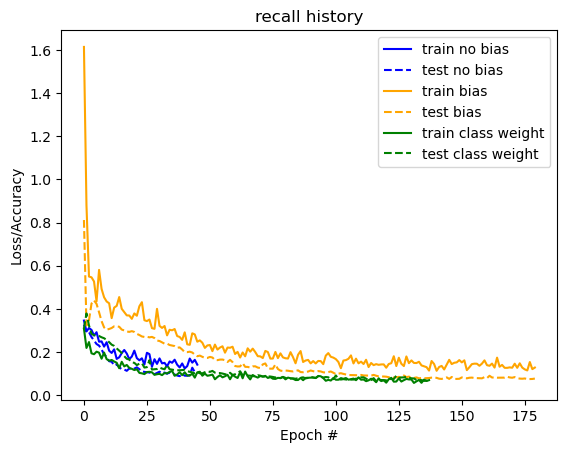

In [88]:
plt.plot(history1.history['loss'], color='blue', label='train no bias')
plt.plot(history1.history['val_loss'], color='blue',linestyle="--",  label='test no bias')

plt.plot(history2.history['loss'], color='orange', label='train bias')
plt.plot(history2.history['val_loss'], color='orange', linestyle="--", label='test bias')

plt.plot(history3.history['loss'], color='green', label='train class weight')
plt.plot(history3.history['val_loss'], color='green', linestyle="--", label='test class weight')

plt.title("recall history")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="best")

plt.show()


# Testowanie zachowania metryk

# Only 0 predictions

## Valitation output

| metric   |        test |       train |
|:---------|------------:|------------:|
| tp       | 148         | 494         |
| fp       |  14         |  46         |
| tn       |   0         |   0         |
| fn       |   0         |   0         |
| recall   |   1         |   1         |
| pre      |   0.91358   |   0.914815  |
| acc      |   0.91358   |   0.914815  |
| prc      |   0.91358   |   0.914815  |
| r2       |  -0.0945946 |  -0.0924855 |

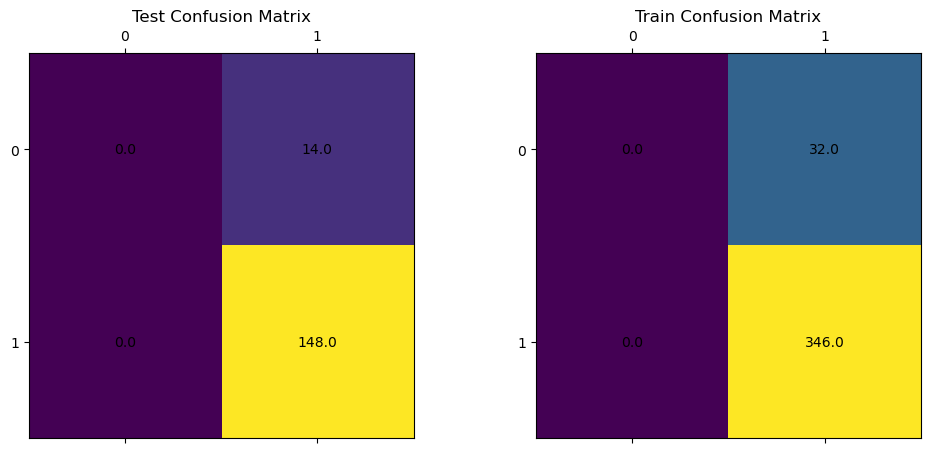

In [89]:
# validation on only 1 class answers

validate(np.ones(test_x.shape[0]), np.ones(train_x.shape[0]), title="Only 0 predictions")

# Perfect predictions

## Valitation output

| metric   |   test |   train |
|:---------|-------:|--------:|
| tp       |    148 |     494 |
| fp       |      0 |       0 |
| tn       |     14 |      46 |
| fn       |      0 |       0 |
| recall   |      1 |       1 |
| pre      |      1 |       1 |
| acc      |      1 |       1 |
| prc      |      1 |       1 |
| r2       |      1 |       1 |

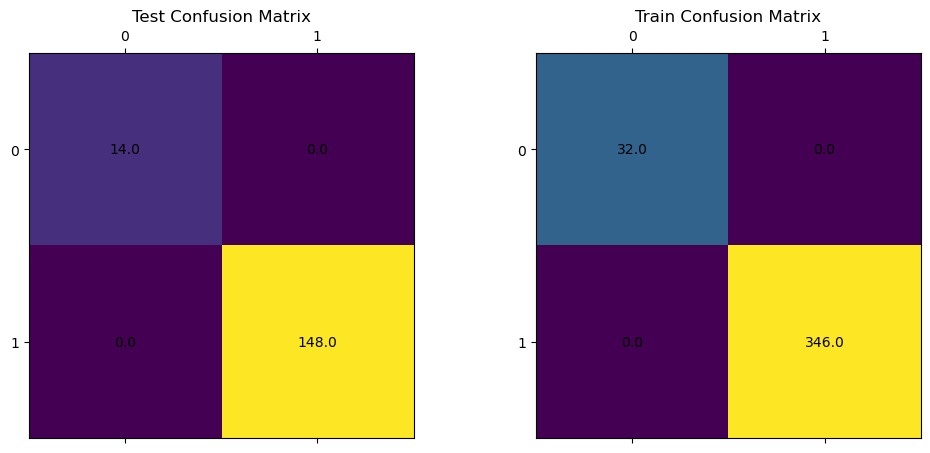

In [90]:
validate(test_y, train_y, title="Perfect predictions")